# Kablosuz Ağlar Projesi

# Makine Öğrenmesi Teknikleri ile Saldırı Tespiti

# Linda Türkmen

Makine Öğrenmesi Teknikleriyle Saldırı Tespiti:
Saldırı Tespit Sistemleri; İlk saldırı tespit sistemi konsepti Anderson tarafından 1980 yılında önerilmişti. saldırı tespit sisteminin görevini, bilgisayar sisteminde ya da ağ sisteminde gerçekleşen tüm olayları denetlemek ve kontrol etmek, güvenlik sorunları ortaya çıktığında ilgili personel ve birimleri uyarmak için alarm göndermek ve olası riskleri azaltmak için gerekli tedbirleri almak şeklinde tanımlamıştır. Saldırı tespit sisteminin çalışma döngüsünü bilgi toplama, analiz motoru ve cevap olarak üç başlık altında incelemiştir [1] .

Ağ üzerinden yapılabilecek saldırılar aşağıdaki gibi sıralanabilir:

1) Hizmet engelleme (Denial of Service-DOS) 

2) Yönetici hesabını ele geçirerek yerel ağda oturum açma (Remote to Local-R2L)

3) Kullanıcı hesabını yönetici hesabına yükseltme (User to Root-U2R)
    
4) (Probe): Saldırganın, kaynak üzerinde çalışan hizmetleri tanımlamak için kullanılabilecek açık bağlantı noktaları gibi güvenlik açıkları için bir ağı araştırdığı bir saldırı sınıfıdır. Genellikle, tanımlanmış bir güvenlik açığı aracılığıyla beklemeyen bir ana bilgisayara ayrıcalıklı erişim elde ederler.

Yapay zekânın bir alt dalı  olan makine öğrenmesini ile saldırı tesip sistemi tasarlanacaktır. Makine öğrenimi algoritmaları, insan müdahalesi olmadan verilerden öğrenebilen ve deneyimler ile geliştirebilen programlardır. Makine öğrenimi algoritmaları denetimli öğrenme ve denetimsiz öğrenme olarak kategorize edilir. Sınıflandırma problemlerinde başarılı bir şekilde kullanılmaktadır. 
Literatürde, saldırı tespit sistemlerinde sıklıkla kullanılan makine öğrenme teknikleri
aşağıdaki gibidir.
-Bayes sınıflama
-Destek vektör makinesi
-Karar ağaçları
-Yapay sinir ağları
-Lojistik Regresyon

Dataset olarak KDD Cup 1999 kullanılmıştır. 

Eldeki probleme en uygun tekniklerin seçilmesi, yeterli sayıdaki tekniklerin denenmesi ile mümkün olabilmektedir.  Bu nedenle veri önişleme ve model kurma aşamaları, en iyi sonucu veren tekniğe ulaşıncaya kadar tekrarlayan bir süreçtir. Problemin başarımla yapılabilmesi için problemimize uygun çözüm olarak sınıflandırma modelleri kullanılmıştır. Dolaysıyla bizim problemimiz özelinde Denetimli öğrenme modelleri ile uygun çözüm gerçekleştirilmiştir. Denetimli öğrenmede seçilen tekniğe uygun hazırlanan verilerin, ilk aşamada bir kısmı modelin öğrenimi, diğer kısmı ise modelin performansının test edilmesi için ayrılmaktadır. Modelin eğitilmesi, eğitim verisi üzerinde uygulandıktan sonra, test verisi ile modelin doğruluk oranı belirlenmektedir. Model kuruluşu çalışmalarının sonucuna bağlı olarak, aynı teknikle farklı parametrelerin kullanıldığı veya başka algoritma ve araçların denendiği değişik modeller kurulabilmektedir. Bu sebeple projemizde accuracy ve diğer metriklerin daha iyi yorumlanabilmesi ve yüksek değerlerin elde edilmesi için farklı makine öğrenmesi modelleri de kullanılmıştır. Bunları kısaca açıklamak gerekirse: 

# 5 Farklı İnceleme Adımları:

Beş farklı şekilde dataset üzerinde analizler yapıldı.

1) Başlangıç olarak DOS, U2R, R2L ve Probe'ı karegorilerin kendi içinde attack sınıfları mevcut.  Her bir kategorinin attack sınıslarını ayırdım ve toplamda 5 tane ayrı  dataset oluşturmuş oldum. Her bir kategoriyi kendi içinde sınıflandırdım. Örneğin DOS datasetinde [smurf, neptune, back, pod, teardrop] attack sınıfları mevcut. Bunrada DOS datasetinde sınıflandırmaya çalışrığım attack tipleri. Bu işlem diğer tüm kategoryler için de gerçekleştirildi. Heri bir dataset için eğitim ve test adımlarını gerçekleşitrdim. Daha kolay yorumlayabilmek adına Confusion Matrisini ve diğer metricleri hesapladım. Sonuçları daha rahat bir şekilde görebilmek için tablo ile ifade ettim.

2) Bu aşamada 2 sınıf ile çalıştım. normal ve anormal şeklinde. [label] sütununda bulunun normal dışındaki tüm sınıfları(attacks) anormal olarak isimlendirildi, sınıflandırma iki sınıf üzerinde yapıldı. Eğitim ve test aşmasında sonra önceki bölümde olduğu gibi Confusion Matrisi ve diğer metricler hesaplandı.


3) Datasetini olduğu gibi sınıflandırma. Totalde [label] sütununda 23 tane sınıf mevcut. Buradaki amacım herhangi bir gruplama yapılmadan datasetin saf hali alınarak, çoklu sınıf ayrıştırmasında modelimizin sonucunu gözlemlemek ve accuracy değerinde herhangi bir değişim oranı olup olmadığını öğrenmek. 

4) Dataset içinde kategorik feature/sütun sayısı 3, bunlar ["service_num", "protocol_type", "flag_num"]. Bundan önceki eğtimlerde bu sütunları dahil edilmedi. Bu aşamada bu sütunlar nümerik değerlere dönüştürüldü ve featurer olarak sadece bu 3 sütun kullanılarak sınıflandırma yapıldı.

5) Son olarak ise veri setini genel kategorilere göre sınıflandırıldı ve toplamda 5 sınıfım oldu. [normal, dos, u2r, r2l, probe] sınıfları. Buradaki amacım kategoriye göre nasil başar sergileyeceğinin gözlemlemek. 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.model_selection import train_test_split
from scikitplot.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from PIL import Image

import matplotlib.pyplot as plt
from scikitplot.metrics import plot_confusion_matrix

In [6]:
# Not: dataset [https://datahub.io/machine-learning/kddcup99] sitesinden yüklenmiştir. 

import datapackage
import pandas as pd

data_url = 'https://datahub.io/machine-learning/kddcup99/datapackage.json'

# to load Data Package into storage
package = datapackage.Package(data_url)

# to load only tabular data
resources = package.resources
for resource in resources:
    if resource.tabular:
        data = pd.read_csv(resource.descriptor['path'])
        #print (data)
        
data.sample(n=10)        

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
51842,0,tcp,http,RSTR,16952,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.05,0.05,back
52564,0,icmp,eco_i,SF,8,0,0,0,0,0,...,255,1.00,0.00,1.00,0.50,0.0,0.0,0.00,0.00,ipsweep
484671,0,tcp,http,SF,232,1233,0,0,0,0,...,255,1.00,0.00,0.02,0.01,0.0,0.0,0.00,0.00,normal
31869,0,tcp,http,SF,324,1320,0,0,0,0,...,255,1.00,0.00,0.01,0.00,0.0,0.0,0.00,0.00,normal
129649,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.00,0.00,smurf
357538,0,tcp,bgp,S0,0,0,0,0,0,0,...,5,0.02,0.07,0.00,0.00,1.0,1.0,0.00,0.00,neptune
427926,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.00,0.00,smurf
202567,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.00,0.00,smurf
454200,0,udp,other,SF,146,0,0,0,0,0,...,2,0.01,0.66,0.98,0.00,0.0,0.0,0.00,0.00,normal
268383,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.00,0.00,smurf


In [7]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal


# kddcup99 Dataset

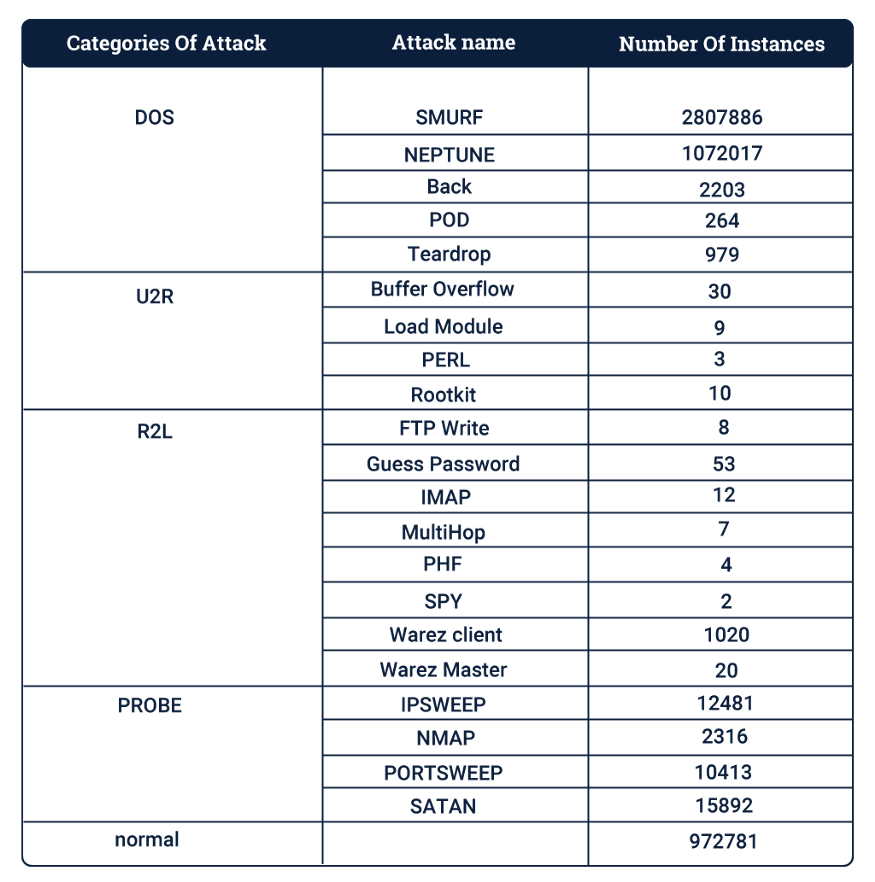

In [8]:
#https://medium.com/cuelogic-technologies/evaluation-of-machine-learning-algorithms-for-intrusion-detection-system-6854645f9211
#fotograf alınan site

from PIL import Image 
attack_class = Image.open("attack_classes.png")
attack_class 

# I.Denial of service (DoS) 

In [9]:
a1 = data[data['label']== "smurf"   ]
a2 = data[data['label']== "neptune" ]  
a3 = data[data['label']== "back"    ]
a4 = data[data['label']== "pod"     ]
a5 = data[data['label']== "teardrop"]

a = [a1, a2, a3, a4, a5]
dos_category = pd.concat(a)
#dos_category

# II.User to root attacks (U2R)

In [10]:
b1 = data[data['label']== "buffer_overflow"]
b2 = data[data['label']== "loadmodule"    ]
b3 = data[data['label']== "perl"           ]
b4 = data[data['label']== "rootkit"        ]


b = [b1, b2, b3, b4]
U2R_category = pd.concat(b)
#U2R_category

# III.Remote to user (R2L)

In [11]:
c1 = data[data['label']== "ftp_write"     ]
c2 = data[data['label']== "guess_passwd"  ]
c3 = data[data['label']== "imap"          ] 
c4 = data[data['label']== "phf"           ]
c5 = data[data['label']== "spy"           ]
c6 = data[data['label']== "warezclient"   ]
c7 = data[data['label']== "warezmaster"   ]
c8 = data[data['label']== "multihop"      ]

 
c = [c1, c2, c3, c4, c5, c6, c7, c8]
R2L_category = pd.concat(c)
#R2L_category

# IV.PROBE

In [12]:
e1 = data[data['label']== "ipsweep"  ]
e2 = data[data['label']== "nmap"     ]
e3 = data[data['label']== "portsweep"]
e4 = data[data['label']== "satan"    ]


e = [e1, e2, e3, e4]
probe_category = pd.concat(e)
#probe_category

# 1.Kısım

1) Başlangıç olarak DOS, U2R, R2L ve Probe'ı karegorilerin kendi içinde attack sınıfları mevcut.  Her bir kategorinin attack sınıslarını ayırdım ve toplamda 5 tane ayrı  dataset oluşturmuş oldum. Her bir kategoriyi kendi içinde sınıflandırdım. Örneğin DOS datasetinde [smurf, neptune, back, pod, teardrop] attack sınıfları mevcut. Bunrada DOS datasetinde sınıflandırmaya çalışrığım attack tipleri. Bu işlem diğer tüm kategoryler için de gerçekleştirildi. Heri bir dataset için eğitim ve test adımlarını gerçekleşitrdim. Daha kolay yorumlayabilmek adına Confusion Matrisini ve diğer metricleri hesapladım. Sonuçları daha rahat bir şekilde görebilmek için tablo ile ifade ettim.

# 1.1 Classifier_DoS

DOS dataseti ile sınıflandırma 
Sınıf sayısı: 5

In [13]:
f_list = list(data.columns)
print("Features:")
f_list[4:41] #features #protocol_type, service, flag sütunları kullanılmadı.

Features:


['src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'lnum_compromised',
 'lroot_shell',
 'lsu_attempted',
 'lnum_root',
 'lnum_file_creations',
 'lnum_shells',
 'lnum_access_files',
 'lnum_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [14]:
sample_list_svm = []  #sample_size'ları tutan liste
acc_list_svm    = []  #her bir sample karşılık gelen 
best_acc_svm = 0
  
k =dos_category.loc[:, 'label']
y = list(k)
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(y)

feature_names = f_list[4:41]
X = dos_category[feature_names].values
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.20, random_state =0)
sc=StandardScaler()
X_train = sc.fit_transform(x_train) 
X_test = sc.transform(x_test)


logr = LogisticRegression(random_state =0)
logr.fit(X_train, y_train) 
y_pred_logr_dos = logr.predict(X_test)
acc_logr_dos = accuracy_score(y_test, y_pred_logr_dos)


svc = SVC(kernel="rbf")
svc.fit(X_train, y_train)
y_pred_svm_dos = svc.predict(X_test)
acc_svm_dos = accuracy_score(y_test, y_pred_svm_dos)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc_dos = dtc.predict(X_test)
acc_dtc_dos= accuracy_score(y_test, y_pred_dtc_dos)


mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(X_train, y_train)
y_pred_mlp_dos = mlp.predict(X_test)
acc_mlp_dos = accuracy_score(y_test, y_pred_mlp_dos)



gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb_dos = gnb.predict(X_test)
acc_gnb_dos = accuracy_score(y_test, y_pred_gnb_dos)


print("Accuracy List: ")
print("Accuracy Logistic Regression : ", acc_logr_dos*100)
print("Accuracy SVM  : ", acc_svm_dos*100)
print("Accuracy Decision Tree Classifier : ",acc_dtc_dos*100)
print("Accuracy Gaussian Naive Bayes : ", acc_gnb_dos*100)
print("Accuracy MLPClassifier : ",acc_mlp_dos*100)


C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy List: 
Accuracy Logistic Regression :  100.0
Accuracy SVM  :  99.99744533006336
Accuracy Decision Tree Classifier :  100.0
Accuracy Gaussian Naive Bayes :  99.97062129572859
Accuracy MLPClassifier :  99.99744533006336


Confusion matrisi:
Confusion matrisi kullanılmasının sebebi kurulan bir sınıflandırma modelinin sonuçlarını yorumlayabilmek, gerçek ve tahmin edilen değerler arasında yer alan ilişkideki hataları çapraz olarak inceleyebilmek içindir. 
Tipik olarak denetimli bir öğrenme algoritması olan bir algoritmanın performansının görselleştirilmesine izin veren özel bir tablo düzenidir. 
True Positive ve True Negative modelin doğru olarak tahminlediği, False Positive ve False Negative ise modelin yanlış olarak tahminlediği alanlardır. TP'leri diagonal  elamanlar oluşturmaktadır. 

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

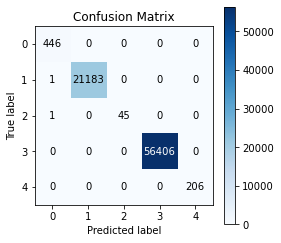

In [15]:

fig, ax = plt.subplots(figsize=(4,4))
plot_confusion_matrix(y_test,y_pred_svm_dos, ax=ax)
    

Verisetinin doğruluğuna ve dengeli olup olmadığının kararının verilmesi için accuracy değerine bakılması yeterli olmamaktadır.
Bu nedenle projemizde diğer metrikler de hesaplanmıştır. Hesaplanan diğer metrikler:

Hassasiyet (Precision): Tüm sınıflardan, doğru olarak ne kadar tahmin edildiğinin bir ölçüsüdür. Mümkün olduğu kadar yüksek olması istenmektedir. 
Pozitif Tahmin Edici Değer olarak da bilinmektedir. 
    
F Puanı (F Score): Bu, gerçek pozitif değerlerin oranının (recall) ve hassasiyetin (precision) harmonik ortalamasıdır. 
Sınıflandırıcının ne kadar iyi performans gösterdiğinin bir ölçüsüdür ve sınıflandırıcıları karşılaştırmakta sıklıkla kullanılmakatdır. 

Recall: Modelin pozitif classların kaçta kaçını yakalandığının anlamlandırılması, gözlemlenmesi ve incelenmesi için kullanılmaktadır.

Bu metriklerin önemi, modeli hangi amaçla geliştirdiğinize göre değişim göstermektedir.

In [16]:
print('recall: ', recall_score(y_test, y_pred_svm_dos, average= 'macro')*100)
print('precision: ', precision_score(y_test, y_pred_svm_dos, average= 'macro')*100)
print('F1 Score:  ', f1_score(y_test, y_pred_svm_dos, average= 'macro')*100)
print('acc:  ' , accuracy_score(y_test, y_pred_svm_dos)*100)

recall:  99.56427328254301
precision:  99.91071428571429
F1 Score:   99.7350049853906
acc:   99.99744533006336


# 1.2.U2R

In [22]:

k =U2R_category.loc[:, "label"]
y = list(k)
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(y)

feature_names = f_list[5:40]
X = U2R_category[feature_names].values
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.30, random_state =0)
sc=StandardScaler()
X_train = sc.fit_transform(x_train) 
X_test = sc.transform(x_test)


logr = LogisticRegression(random_state =0)
logr.fit(X_train, y_train) 
y_pred_logr_U2R = logr.predict(X_test)
acc_logr_U2R = accuracy_score(y_test, y_pred_logr_U2R)


svc = SVC(kernel="rbf")
svc.fit(X_train, y_train)
y_pred_svm_U2R = svc.predict(X_test)
acc_svm_U2R = accuracy_score(y_test, y_pred_svm_U2R)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc_U2R = dtc.predict(X_test)
acc_dtc_U2R= accuracy_score(y_test, y_pred_dtc_U2R)

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(X_train, y_train)
y_pred_mlp_U2R = mlp.predict(X_test)
acc_mlp_U2R = accuracy_score(y_test, y_pred_mlp_U2R)



gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb_U2R = gnb.predict(X_test)
acc_gnb_U2R = accuracy_score(y_test, y_pred_gnb_U2R)


print("Accuracy List: ")
print("Accuracy Logistic Regression : ", acc_logr_U2R*100)
print("Accuracy SVM  : ", acc_svm_U2R*100)
print("Accuracy Decision Tree Classifier : ",acc_dtc_U2R*100)
print("Accuracy Gaussian Naive Bayes : ", acc_gnb_U2R*100)
print("Accuracy MLPClassifier : ",acc_mlp_U2R*100)

Accuracy List: 
Accuracy Logistic Regression :  81.25
Accuracy SVM  :  81.25
Accuracy Decision Tree Classifier :  68.75
Accuracy Gaussian Naive Bayes :  75.0
Accuracy MLPClassifier :  56.25


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

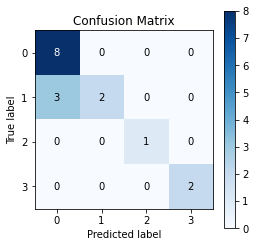

In [25]:

fig, ax = plt.subplots(figsize=(4,4))
plot_confusion_matrix(y_test,y_pred_svm_U2R, ax=ax)

In [26]:
print('recall: ', recall_score(y_test, y_pred_svm_U2R, average= 'macro')*100)
print('precision: ', precision_score(y_test, y_pred_svm_U2R, average= 'macro')*100)
print('F1 Score:  ', f1_score(y_test, y_pred_svm_U2R, average= 'macro')*100)
print('acc:  ' , accuracy_score(y_test, y_pred_svm_U2R)*100)

recall:  85.0
precision:  93.18181818181819
F1 Score:   85.33834586466166
acc:   81.25


# 1.3 R2L

In [32]:
k =R2L_category.loc[:, "label"]
y = list(k)
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(y)
#feature_names = ['src_bytes',"wrong_fragment", 'dst_host_srv_count', 'src_bytes',"dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate" ]

feature_names = f_list[5:40]
X = R2L_category[feature_names].values
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.30, random_state =0)
sc=StandardScaler()
X_train = sc.fit_transform(x_train) 
X_test = sc.transform(x_test)


logr = LogisticRegression(random_state =0)
logr.fit(X_train, y_train) 
y_pred_logr_r2l = logr.predict(X_test)
acc_logr_r2l = accuracy_score(y_test, y_pred_logr_r2l)


svc = SVC(kernel="rbf")
svc.fit(X_train, y_train)
y_pred_svm_r2l = svc.predict(X_test)
acc_svm_r2l = accuracy_score(y_test, y_pred_svm_r2l)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc_r2l = dtc.predict(X_test)
acc_dtc_r2l= accuracy_score(y_test, y_pred_dtc_r2l)


mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(X_train, y_train)
y_pred_mlp_r2l = mlp.predict(X_test)
acc_mlp_r2l = accuracy_score(y_test, y_pred_mlp_r2l)



gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb_r2l = gnb.predict(X_test)
acc_gnb_r2l = accuracy_score(y_test, y_pred_gnb_r2l)


print("Accuracy List: ")
print("Accuracy Logistic Regression : ", acc_logr_r2l*100)
print("Accuracy SVM  : ", acc_svm_r2l*100)
print("Accuracy Decision Tree Classifier : ",acc_dtc_r2l*100)
print("Accuracy Gaussian Naive Bayes : ", acc_gnb_r2l*100)
print("Accuracy MLPClassifier : ",acc_mlp_r2l*100)

Accuracy List: 
Accuracy Logistic Regression :  97.0414201183432
Accuracy SVM  :  96.44970414201184
Accuracy Decision Tree Classifier :  97.33727810650888
Accuracy Gaussian Naive Bayes :  61.24260355029586
Accuracy MLPClassifier :  96.15384615384616


C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

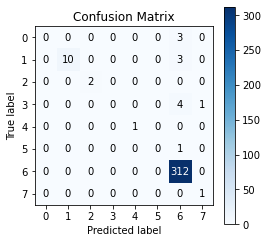

In [33]:

fig, ax = plt.subplots(figsize=(4,4))
plot_confusion_matrix(y_test,y_pred_svm_r2l, ax=ax)
    

In [34]:
print('recall: ', recall_score(y_test, y_pred_svm_r2l, average= 'macro')*100)
print('precision: ', precision_score(y_test, y_pred_svm_r2l, average= 'macro')*100)
print('F1 Score:  ', f1_score(y_test, y_pred_svm_r2l, average= 'macro')*100)
print('acc:  ' , accuracy_score(y_test, y_pred_svm_r2l)*100)

recall:  59.61538461538461
precision:  55.82430340557276
F1 Score:   56.486363117653774
acc:   96.44970414201184


C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 1.4 Probe

In [35]:
k =probe_category.loc[:, "label"]
y = list(k)
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(y)
#feature_names = ['src_bytes',"wrong_fragment", 'dst_host_srv_count', 'src_bytes',"dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate" ]

feature_names = f_list[5:40]
X = probe_category[feature_names].values
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.30, random_state =0)
sc=StandardScaler()
X_train = sc.fit_transform(x_train) 
X_test = sc.transform(x_test)


logr = LogisticRegression(random_state =0)
logr.fit(X_train, y_train) 
y_pred_logr_probe = logr.predict(X_test)
acc_logr_probe = accuracy_score(y_test, y_pred_logr_probe)


svc = SVC(kernel="rbf")
svc.fit(X_train, y_train)
y_pred_svm_probe = svc.predict(X_test)
acc_svm_probe = accuracy_score(y_test, y_pred_svm_probe)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc_probe = dtc.predict(X_test)
acc_dtc_probe= accuracy_score(y_test, y_pred_dtc_probe)

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(X_train, y_train)
y_pred_mlp_probe = mlp.predict(X_test)
acc_mlp_probe = accuracy_score(y_test, y_pred_mlp_probe)



gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb_r2l = gnb.predict(X_test)
acc_gnb_probe = accuracy_score(y_test, y_pred_gnb_r2l)


print("Accuracy List: ")
print("Accuracy Logistic Regression : ", acc_logr_probe*100)
print("Accuracy SVM  : ", acc_svm_probe*100)
print("Accuracy Decision Tree Classifier : ",acc_dtc_probe*100)
print("Accuracy Gaussian Naive Bayes : ", acc_gnb_probe*100)
print("Accuracy MLPClassifier : ",acc_mlp_probe*100)

C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy List: 
Accuracy Logistic Regression :  99.43227899432279
Accuracy SVM  :  99.27007299270073
Accuracy Decision Tree Classifier :  99.18896999188969
Accuracy Gaussian Naive Bayes :  92.37631792376317
Accuracy MLPClassifier :  96.99918896999189


C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

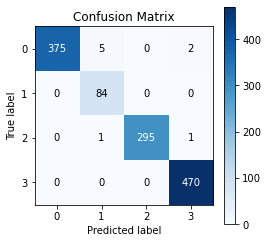

In [36]:

fig, ax = plt.subplots(figsize=(4,4))
plot_confusion_matrix(y_test,y_pred_svm_probe, ax=ax)

In [37]:
print('recall: ', recall_score(y_test, y_pred_svm_probe, average= 'macro')*100)
print('precision: ', precision_score(y_test, y_pred_svm_probe, average= 'macro')*100)
print('F1 Score:  ', f1_score(y_test, y_pred_svm_probe, average= 'macro')*100)
print('acc:  ' , accuracy_score(y_test,y_pred_svm_probe)*100)

recall:  99.37353464840375
precision:  98.17477096546865
F1 Score:   98.74276247746651
acc:   99.27007299270073


1.kısımı sonuç :

logr, SVM, dtc, gnb, ve MLP modelleri ile eğitim gerçekleştirilmiştir. Ayrıca bu modeller test edilmiştir.
Aşağıda yazdırılan tabloda sadece SVM modelinin  sonuçları bulunmaktadır.
Test sonuçları incelendiğinde sınıflandırma ile en iyi DOS kategorisindeki attackları tespit edebildik. Sınıflandırma başarıları saldırı kategorilerine göre değişmektedir. Diğer çalışmaları incelendiği zaman bu değerlerin normal olduğu yorumlanabilir. 


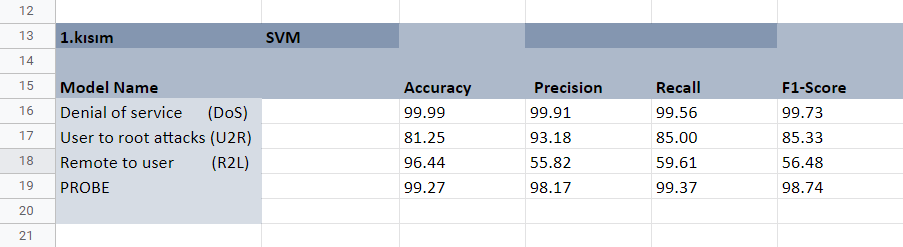

In [1]:
from PIL import Image

kisim_1 = Image.open("1.kısım.png")
kisim_1

# 2.Kısım

# Normal-Anormal, iki sınıflı 

2) Bu aşamada 2 sınıf ile çalıştım. normal ve anormal şeklinde. [label] sütununda bulunun normal dışındaki tüm sınıfları(attacks) anormal olarak isimlendirildi, sınıflandırma iki sınıf üzerinde yapıldı. Eğitim ve test aşmasında sonra önceki bölümde olduğu gibi Confusion Matrisi ve diğer metricler hesaplandı.


In [11]:
data2 = data.copy()
data2

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal


In [12]:
a = 'normal'
b = 'Anormal'
data2["label"] = data2["label"].map({ str(a) : "Normal", "smurf" : str(b), "neptune" : str(b),"back" : str(b),"pod" : str(b),"teardrop" : str(b),"buffer_overflow" : str(b),"loadmodule" : str(b),"perl" : str(b),"rootkit" : str(b),"ftp_write" : str(b),"guess_passwd" : str(b),"imap" : str(b),"phf" : str(b),"spy"  : str(b),"warezclient" : str(b),"warezmaster" : str(b),"multihop" : str(b),"ipsweep" : str(b),"nmap" : str(b),"portsweep" : str(b), "satan" : str(b)})

In [13]:
str(a)

'normal'

In [14]:
data2.sample(n= 5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
483541,0,tcp,http,SF,245,185,0,0,0,0,...,255,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,Normal
244004,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,Anormal
379455,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.05,0.0,0.0,1.0,1.0,0.0,0.0,Anormal
204297,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,Anormal
255477,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,Anormal


In [15]:
normal = data2[data2['label']== "Normal"]
anormal = data2[data2['label']== "Anormal"]


d_2 = [normal, anormal]
data_2 = pd.concat(d_2)
data_2

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.00,0.00,0.11,0.0,0.0,0.0,0.0,0.0,Normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.00,0.00,0.05,0.0,0.0,0.0,0.0,0.0,Normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.00,0.00,0.03,0.0,0.0,0.0,0.0,0.0,Normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.00,0.00,0.03,0.0,0.0,0.0,0.0,0.0,Normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.00,0.00,0.02,0.0,0.0,0.0,0.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490959,0,udp,private,SF,28,0,0,3,0,0,...,96,0.38,0.01,0.38,0.0,0.0,0.0,0.0,0.0,Anormal
490960,0,udp,private,SF,28,0,0,3,0,0,...,97,0.38,0.01,0.38,0.0,0.0,0.0,0.0,0.0,Anormal
490961,0,udp,private,SF,28,0,0,3,0,0,...,98,0.38,0.01,0.38,0.0,0.0,0.0,0.0,0.0,Anormal
490962,0,udp,private,SF,28,0,0,3,0,0,...,99,0.39,0.01,0.39,0.0,0.0,0.0,0.0,0.0,Anormal


([<matplotlib.patches.Wedge at 0x20d021ee970>,
 [Text(0.9563146456115803, 0.5435644383040502, 'Normal'),
  Text(-1.173658852021285, -0.6671018655888165, 'Anormal')],
 [Text(0.5216261703335893, 0.296489693620391, '16.5%'),
  Text(-0.738970388309698, -0.4200271005559214, '83.5%')])

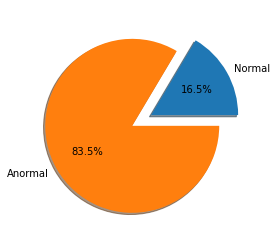

In [18]:
import matplotlib.pyplot as pyplot

type_frequencies = data_2['label'].value_counts()
normal_frequency = type_frequencies['Normal']
intrusion_frequency = sum([count for outcome_type, count in type_frequencies.iteritems() if outcome_type != 'normal.'])

figure = pyplot.figure()
pyplot.pie(
    [normal_frequency, intrusion_frequency],
    labels=["Normal", "Anormal"],
    explode=[0, .25],
    autopct='%1.1f%%',
    shadow=True,
)

In [43]:
f_list = list(data.columns)

In [44]:
k =data_2.loc[:, "label"]
y = list(k)
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(y)

feature_names = f_list[5:40]
X = data_2[feature_names].values
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.30, random_state =0)
sc=StandardScaler()
X_train = sc.fit_transform(x_train) 
X_test = sc.transform(x_test)


logr = LogisticRegression(random_state =0)
logr.fit(X_train, y_train) 
y_pred_logr_2 = logr.predict(X_test)
acc_logr_2 = accuracy_score(y_test, y_pred_logr_2)


svc = SVC(kernel="rbf")
svc.fit(X_train, y_train)
y_pred_svm_2 = svc.predict(X_test)
acc_svm_2 = accuracy_score(y_test, y_pred_svm_2)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc_2 = dtc.predict(X_test)
acc_dtc_2= accuracy_score(y_test, y_pred_dtc_2)


mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(X_train, y_train)
y_pred_mlp_2 = mlp.predict(X_test)
acc_mlp_2 = accuracy_score(y_test, y_pred_mlp_2)



gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb_2 = gnb.predict(X_test)
acc_gnb_2 = accuracy_score(y_test, y_pred_gnb_2)


print("Accuracy List: ")
print("Accuracy Logistic Regression : ", acc_logr_2*100)
print("Accuracy SVM  : ", acc_svm_2*100)
print("Accuracy Decision Tree Classifier : ",acc_dtc_2*100)
print("Accuracy Gaussian Naive Bayes : ", acc_gnb_2*100)
print("Accuracy MLPClassifier : ",acc_mlp_2*100)




C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy List: 
Accuracy Logistic Regression :  99.6336032388664
Accuracy SVM  :  99.8859649122807
Accuracy Decision Tree Classifier :  99.94736842105263
Accuracy Gaussian Naive Bayes :  96.66734143049932
Accuracy MLPClassifier :  99.85492577597842


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

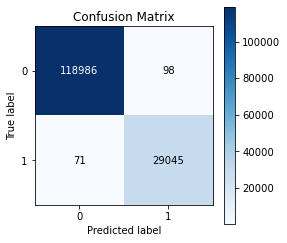

In [46]:
fig, ax = plt.subplots(figsize=(4,4))
plot_confusion_matrix(y_test,y_pred_svm_2, ax=ax)

In [48]:
print('recall: ', recall_score(y_test, y_pred_logr_2, average= 'macro')*100)
print('precision: ', precision_score(y_test, y_pred_logr_2, average= 'macro')*100)
print('F1 Score:  ', f1_score(y_test, y_pred_logr_2, average= 'macro')*100)
print('acc:  ' , accuracy_score(y_test, y_pred_logr_2)*100)

recall:  99.49696147414295
precision:  99.34479588865457
F1 Score:   99.42066019533414
acc:   99.6336032388664


In [49]:
print('recall: ', recall_score(y_test, y_pred_svm_2, average= 'macro')*100)
print('precision: ', precision_score(y_test, y_pred_svm_2, average= 'macro')*100)
print('F1 Score:  ', f1_score(y_test, y_pred_svm_2, average= 'macro')*100)
print('acc:  ' , accuracy_score(y_test, y_pred_svm_2)*100)

recall:  99.83692648590473
precision:  99.80204591892708
F1 Score:   99.81947485210259
acc:   99.8859649122807


In [51]:
print('recall: ', recall_score(y_test, y_pred_dtc_2, average= 'macro')*100)
print('precision: ', precision_score(y_test, y_pred_dtc_2, average= 'macro')*100)
print('F1 Score:  ', f1_score(y_test, y_pred_dtc_2, average= 'macro')*100)
print('acc:  ' , accuracy_score(y_test, y_pred_dtc_2)*100)

recall:  99.91924631316664
precision:  99.91406587408224
F1 Score:   99.91665584395258
acc:   99.94736842105263


In [52]:
print('recall: ', recall_score(y_test, y_pred_gnb_2, average= 'macro')*100)
print('precision: ', precision_score(y_test, y_pred_gnb_2, average= 'macro')*100)
print('F1 Score:  ', f1_score(y_test, y_pred_gnb_2, average= 'macro')*100)
print('acc:  ' , accuracy_score(y_test, y_pred_gnb_2)*100)

recall:  93.69414417353836
precision:  95.60271105563707
F1 Score:   94.61052744256577
acc:   96.66734143049932


In [53]:
print('recall: ', recall_score(y_test, y_pred_mlp_2, average= 'macro')*100)
print('precision: ', precision_score(y_test, y_pred_mlp_2, average= 'macro')*100)
print('F1 Score:  ', f1_score(y_test, y_pred_mlp_2, average= 'macro')*100)
print('acc:  ' , accuracy_score(y_test, y_pred_mlp_2)*100)

recall:  99.79685403359856
precision:  99.74395726175536
F1 Score:   99.7703795064961
acc:   99.85492577597842


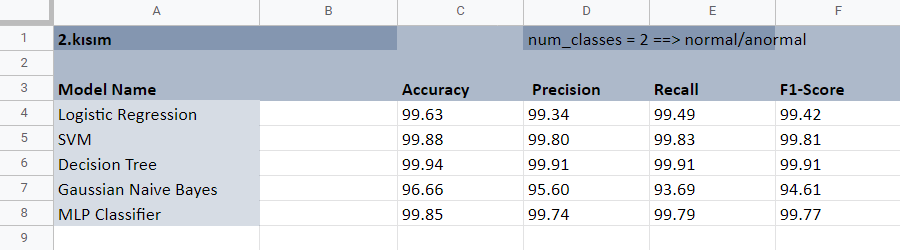

In [3]:
from PIL import Image

kisim_2 = Image.open("2.kısım.png")
kisim_2

# 3.kısım:

3) Datasetini olduğu gibi sınıflandırma. Totalde [label] sütununda 23 tane sınıf mevcut. Buradaki amacım herhangi bir gruplama yapılmadan datasetin saf hali alınarak, çoklu sınıf ayrıştırmasında modelimizin sonucunu gözlemlemek ve accuracy değerinde herhangi bir değişim oranı olup olmadığını öğrenmek. 



num classes = 23

In [22]:
#tüm sınıflar aynı anda classifier

In [23]:
#f_list[9:21]
data_3 = data.copy()
data_3.sample(n=4)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
291771,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.00,0.00,smurf
40183,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.0,0.0,0.0,0.0,0.05,0.05,back
361982,0,tcp,private,S0,0,0,0,0,0,0,...,18,0.07,0.05,0.0,0.0,1.0,1.0,0.00,0.00,neptune
123739,0,tcp,private,S0,0,0,0,0,0,0,...,4,0.02,0.07,0.0,0.0,1.0,1.0,0.00,0.00,neptune


<Figure size 432x288 with 0 Axes>

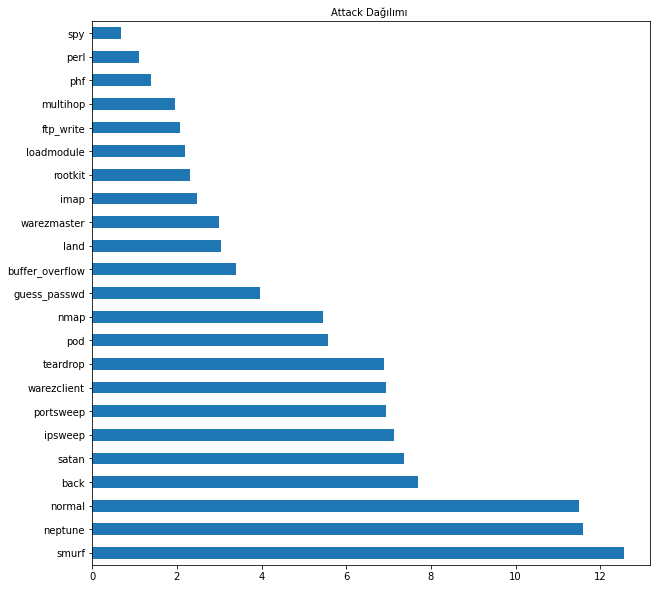

In [27]:
import matplotlib
import matplotlib.pyplot as plt

plt.clf()
plt.figure(figsize=(10,10))
params = {'axes.titlesize':'10',
          'xtick.labelsize':'10',
          'ytick.labelsize':'10'}
matplotlib.rcParams.update(params)
plt.title('Attack Dağılımı ')

data_3['label'].value_counts().apply(np.log).plot(kind='barh')                                                   
plt.show()

In [15]:
k =data_3.loc[:, "label"]
y = list(k)
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(y)

feature_names = f_list[4:41]
X = data_3[feature_names].values
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.30, random_state =0)
sc=StandardScaler()
X_train = sc.fit_transform(x_train) 
X_test = sc.transform(x_test)


logr = LogisticRegression(random_state =0)
logr.fit(X_train, y_train) 
y_pred_logr_3 = logr.predict(X_test)
acc_logr_3 = accuracy_score(y_test, y_pred_logr_3)


svc = SVC(kernel="rbf")
svc.fit(X_train, y_train)
y_pred_svm_3 = svc.predict(X_test)
acc_svm_3 = accuracy_score(y_test, y_pred_svm_3)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc_3 = dtc.predict(X_test)
acc_dtc_3 = accuracy_score(y_test, y_pred_dtc_3)


mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(X_train, y_train)
y_pred_mlp_3 = mlp.predict(X_test)
acc_mlp_3 = accuracy_score(y_test, y_pred_mlp_3)



gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb_3 = gnb.predict(X_test)
acc_gnb_3 = accuracy_score(y_test, y_pred_gnb_3)


print("Accuracy List: ")
print("Accuracy Logistic Regression : ", acc_logr_3*100)
print("Accuracy SVM  : ", acc_svm_3*100)
print("Accuracy Decision Tree Classifier : ",acc_dtc_3*100)
print("Accuracy Gaussian Naive Bayes : ", acc_gnb_3*100)
print("Accuracy MLPClassifier : ",acc_mlp_3*100)




C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy List: 
Accuracy Logistic Regression :  99.81647166781372
Accuracy SVM  :  99.89406636708365
Accuracy Decision Tree Classifier :  99.94737055179952
Accuracy Gaussian Naive Bayes :  88.83176119725246
Accuracy MLPClassifier :  97.34491181193744


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

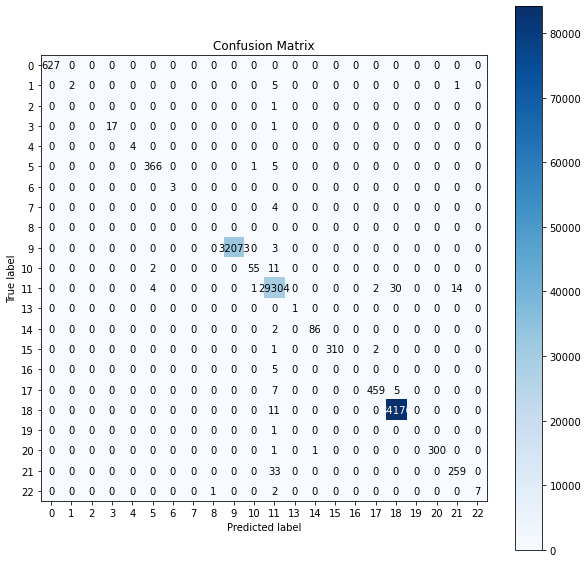

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(y_test,y_pred_svm_3, ax=ax)

In [17]:
print('recall: ', recall_score(y_test, y_pred_svm_3, average= 'macro')*100)
print('precision: ', precision_score(y_test, y_pred_svm_3, average= 'macro')*100)
print('F1 Score:  ', f1_score(y_test, y_pred_svm_3, average= 'macro')*100)
print('acc:  ' , accuracy_score(y_test, y_pred_svm_3)*100)

recall:  70.48977972579547
precision:  76.68329977447286
F1 Score:   72.40382382612371
acc:   99.89406636708365


C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3.kısım sonuç:
5 farklı model ile eğitim ve test gerçekleştirilmiştir.
accuracy metriği tüm modeller için hesaplanmıştır ancak  precision, recall ve f1 score metrikleri ise sadece svm modeli için hesaplanmıştır.
İlk kısımda olduğu gibi bu kısımda da en yüksek başarı Decision Tree Classifier modeli ile elde edilmiştir, acc_dtc: 99.94. genel olarak accuracy değerleri birbirine çok yakın. Diğer metriklere bakıldığı zaman düşüş gözlemlenmektedir. Bunun en önemli nedeni sınıf sayısının artışıdır. İki, dört veya sekiz sınıf şeklinde ayrıştırma yapılırken diğer metric değerleri accuracy değerine yakındı. Ancak 23 sınıfı ayrıştırmaya çalışan model görüldü üzere recall olarak %70 lik bir başarı mevcut her ne kadar accuracy %99'larda iken bile.  

 

# 4.kısım



4) Dataset içinde kategorik feature/sütun sayısı 3, bunlar ["service_num", "protocol_type", "flag_num"]. Bundan önceki eğtimlerde bu sütunları dahil edilmedi. Bu aşamada bu sütunlar nümerik değerlere dönüştürüldü ve feature olarak sadece bu 3 sütun kullanılarak sınıflandırma yapıldı.
 

In [5]:
data_4 = data.copy()

In [6]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()

data_4["service_num"] = ord_enc.fit_transform(data_4[["service"]])
data_4[["service", "service_num"]]

data_4["protocol_type_num"] = ord_enc.fit_transform(data_4[["protocol_type"]])
#data_4[["protocol_type", "protocol_type_num"]]

data_4["flag_num"] = ord_enc.fit_transform(data_4[["flag"]])
data_4[["flag", "flag_num"]].sample(n=10)

,flag,flag_num
252711,SF,9.0
359913,S0,5.0
465907,REJ,1.0
393760,S0,5.0
423603,SF,9.0
124228,S0,5.0
383474,S0,5.0
375230,S0,5.0
65255,S0,5.0
173507,SF,9.0


In [7]:
data_4.sample(n=5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,service_num,protocol_type_num,flag_num
68865,0,tcp,private,S0,0,0,0,0,0,0,...,0.0,0.00,1.0,1.00,0.0,0.0,neptune,45.0,1.0,5.0
455107,0,tcp,ftp_data,SF,1010,0,0,0,0,0,...,0.5,0.02,0.0,0.01,0.0,0.0,normal,19.0,1.0,9.0
122149,0,tcp,private,S0,0,0,0,0,0,0,...,0.0,0.00,1.0,1.00,0.0,0.0,neptune,45.0,1.0,5.0
254682,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.0,0.00,0.0,0.00,0.0,0.0,smurf,14.0,0.0,9.0
386160,0,tcp,private,S0,0,0,0,0,0,0,...,0.0,0.00,1.0,1.00,0.0,0.0,neptune,45.0,1.0,5.0


In [9]:
f4_list = data_4.columns
f4_list[42:45]

Index(['service_num', 'protocol_type_num', 'flag_num'], dtype='object')

In [10]:
k =data_4.loc[:, "label"]
y = list(k)
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(y)
#feature_names = ['src_bytes',"wrong_fragment", 'dst_host_srv_count', 'src_bytes',"dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate" ]

feature_names = f4_list[42:45]
X = data_4[feature_names].values
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.30, random_state =0)
sc=StandardScaler()
X_train = sc.fit_transform(x_train) 
X_test = sc.transform(x_test)


logr = LogisticRegression(random_state =0)
logr.fit(X_train, y_train) 
y_pred_logr_4 = logr.predict(X_test)
acc_logr_4 = accuracy_score(y_test, y_pred_logr_4)


svc = SVC(kernel="rbf")
svc.fit(X_train, y_train)
y_pred_svm_4 = svc.predict(X_test)
acc_svm_4 = accuracy_score(y_test, y_pred_svm_4)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc_4 = dtc.predict(X_test)
acc_dtc_4 = accuracy_score(y_test, y_pred_dtc_4)


mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(X_train, y_train)
y_pred_mlp_4 = mlp.predict(X_test)
acc_mlp_4 = accuracy_score(y_test, y_pred_mlp_4)



gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb_4 = gnb.predict(X_test)
acc_gnb_4 = accuracy_score(y_test, y_pred_gnb_4)


print("Accuracy List: ")
print("Accuracy Logistic Regression : ", acc_logr_4*100)
print("Accuracy SVM  : ", acc_svm_4*100)
print("Accuracy Decision Tree Classifier : ",acc_dtc_4*100)
print("Accuracy Gaussian Naive Bayes : ", acc_gnb_4*100)
print("Accuracy MLPClassifier : ",acc_mlp_4*100)




C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy List: 
Accuracy Logistic Regression :  96.22687340593498
Accuracy SVM  :  98.6592985439186
Accuracy Decision Tree Classifier :  98.76523217683496
Accuracy Gaussian Naive Bayes :  79.16008798564161
Accuracy MLPClassifier :  78.635817713183


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

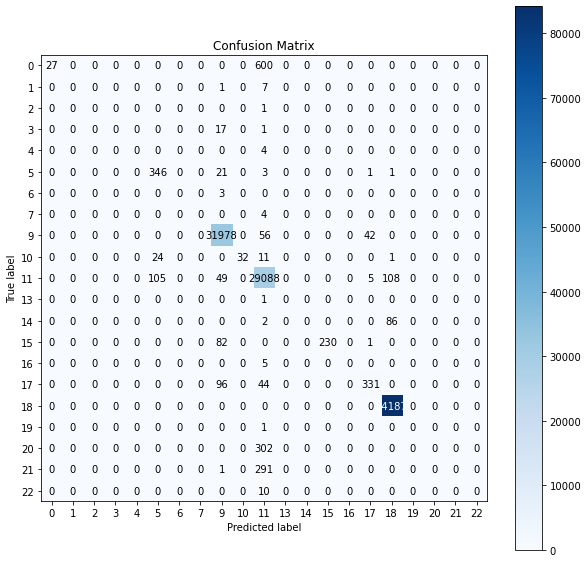

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(y_test,y_pred_svm_4, ax=ax)

In [12]:
print('recall: ', recall_score(y_test, y_pred_svm_4, average= 'macro')*100)
print('precision: ', precision_score(y_test, y_pred_svm_4, average= 'macro')*100)
print('F1 Score:  ', f1_score(y_test, y_pred_svm_4, average= 'macro')*100)
print('acc:  ' , accuracy_score(y_test, y_pred_svm_4)*100)

recall:  27.948531099964814
precision:  35.92688429195541
F1 Score:   29.19433656526068
acc:   98.6592985439186


C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4.kısım sonuç:
5 farklı model ile eğitim ve test gerçekleştirilmiştir.
accuracy metriği tüm modeller için hesaplanmıştır ancak  precision, recall ve f1 score metrikleri ise sadece svm modeli için hesaplanmıştır.

Bundan önceki aşamalarda datasetin [4:41] sütunları feature olarak kullanılmıştı. İlk 3 sütun kategorik verileri olduğu için ve onları ayrı gözlemlemek istediğim için katılmamıştı. Bu aşamada ise başlangıç olarak ['service_num', 'protocol_type_num', 'flag_num'] sütunlarını nümerik değerlere dönüştürüldü ve sadece 3 sütun/feature kullanark eğitim yapıldı. Bu kısımdaki temel amacım ilk kısımlara nazaran çok daha asıyda feature ile model nasil bir ayrıştırma gereçkleştirebileceğinin gözlemlemekti. 

En yüksek Accuracy  değerinin Decision Tree modeli ile elde edilmişit. acc_dtc = 98.76 , en düşük Accuracy değeri ise MLPClassifier ile elde edildi. acc_mlp = 78.63. Farklı modeller kullanmanın faydalarını bu gibi karşılaştırmalarda görmek mümkündür. 

Her ne kadar Accuracy değerleri yüksek olsada da diğer metriclere bakıldığı zaman %20-35 değerleri arasında olduğu görebiliyoruz. Bunun nedeni modelin öğrenmesi için yeterli sayıda öznitelik/feature olmadığında kaynaklı olabilir.


# 5.kısım:


5) Son olarak ise veri setini genel kategorilere göre sınıflandırıldı ve toplamda 5 sınıfım oldu. [normal, dos, u2r, r2l, probe] sınıfları. Buradaki amacım kategoriye göre nasil başar sergileyeceğinin gözlemlemek. 

In [28]:
data_5 = data.copy()

In [29]:
#data_5

In [30]:
a = 'normal'
b = 'dos'
c=  'u2r'
e = 'r2l'
f = 'probe'
data_5["label"] = data_5["label"].map({ str(a) : "Normal", "smurf" : str(b), "neptune" : str(b),"back" : str(b),"pod" : str(b),"teardrop" : str(b),"buffer_overflow" : str(c),"loadmodule" : str(c),"perl" : str(c),"rootkit" : str(c),"ftp_write" : str(e),"guess_passwd" : str(e),"imap" : str(e),"phf" : str(e),"spy"  : str(e),"warezclient" : str(e),"warezmaster" : str(e),"multihop" : str(e),"ipsweep" : str(f),"nmap" : str(f),"portsweep" : str(f), "satan" : str(f)})

In [31]:
normal = data_5[data_5['label']== "Normal"]
dos    = data_5[data_5['label']== "dos"]
u2r    = data_5[data_5['label']== "u2r"]
r2l    = data_5[data_5['label']== "r2l"]
probe  = data_5[data_5['label']== "probe"]



d_5 = [normal, dos, u2r, r2l, probe]
data_5 = pd.concat(d_5)
data_5

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,Normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,Normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,Normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,Normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485168,0,icmp,eco_i,SF,18,0,0,0,0,0,...,255,1.0,0.0,1.00,0.25,0.0,0.0,0.0,0.0,probe
485169,0,icmp,eco_i,SF,18,0,0,0,0,0,...,255,1.0,0.0,1.00,0.25,0.0,0.0,0.0,0.0,probe
485170,0,icmp,eco_i,SF,18,0,0,0,0,0,...,255,1.0,0.0,1.00,0.25,0.0,0.0,0.0,0.0,probe
485171,0,icmp,eco_i,SF,18,0,0,0,0,0,...,255,1.0,0.0,1.00,0.25,0.0,0.0,0.0,0.0,probe


In [32]:
data_5.sample(n= 10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
381276,0,tcp,private,S0,0,0,0,0,0,0,...,11,0.04,0.07,0.00,0.0,1.0,1.0,0.0,0.0,dos
186558,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,dos
276161,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,dos
164680,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,dos
132519,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,dos
266068,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,dos
94707,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,dos
75960,0,udp,domain_u,SF,44,44,0,0,0,0,...,254,1.00,0.01,0.00,0.0,0.0,0.0,0.0,0.0,Normal
450919,0,tcp,time,SF,0,4,0,0,0,0,...,9,1.00,0.00,0.11,0.0,0.0,0.0,0.0,0.0,Normal
293556,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,dos


<Figure size 432x288 with 0 Axes>

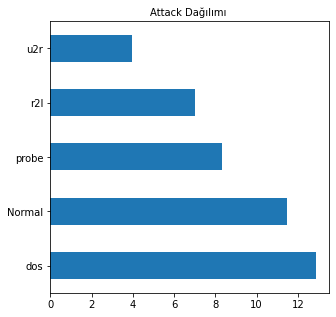

In [36]:
import matplotlib
import matplotlib.pyplot as plt

plt.clf()
plt.figure(figsize=(5,5))
params = {'axes.titlesize':'10',
          'xtick.labelsize':'10',
          'ytick.labelsize':'10'}
matplotlib.rcParams.update(params)
plt.title('Attack Dağılımı ')

data_5['label'].value_counts().apply(np.log).plot(kind='barh')                                                   
plt.show()

In [24]:
f5_list = list(data_5.columns)
#print("Features:")
#f5_list[4:41]

In [25]:
k =data_5.loc[:, "label"]
y = list(k)
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(y)
#feature_names = ['src_bytes',"wrong_fragment", 'dst_host_srv_count', 'src_bytes',"dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate" ]

feature_names = f5_list[4:41]
X = data_5[feature_names].values
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.30, random_state =0)
sc=StandardScaler()
X_train = sc.fit_transform(x_train) 
X_test = sc.transform(x_test)


logr = LogisticRegression(random_state =0)
logr.fit(X_train, y_train) 
y_pred_logr_5 = logr.predict(X_test)
acc_logr_5 = accuracy_score(y_test, y_pred_logr_5)


svc = SVC(kernel="rbf")
svc.fit(X_train, y_train)
y_pred_svm_5 = svc.predict(X_test)
acc_svm_5 = accuracy_score(y_test, y_pred_svm_5)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc_5 = dtc.predict(X_test)
acc_dtc_5 = accuracy_score(y_test, y_pred_dtc_5)


mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(X_train, y_train)
y_pred_mlp_5 = mlp.predict(X_test)
acc_mlp_5 = accuracy_score(y_test, y_pred_mlp_5)



gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb_5 = gnb.predict(X_test)
acc_gnb_5 = accuracy_score(y_test, y_pred_gnb_5)


print("Accuracy List: ")
print("Accuracy Logistic Regression : ", acc_logr_5*100)
print("Accuracy SVM  : ", acc_svm_5*100)
print("Accuracy Decision Tree Classifier : ",acc_dtc_5*100)
print("Accuracy Gaussian Naive Bayes : ", acc_gnb_5*100)
print("Accuracy MLPClassifier : ",acc_mlp_5*100)



C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Linda7lll\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy List: 
Accuracy Logistic Regression :  99.73144399460189
Accuracy SVM  :  99.89608636977057
Accuracy Decision Tree Classifier :  99.9574898785425
Accuracy Gaussian Naive Bayes :  85.11470985155196
Accuracy MLPClassifier :  99.18960863697706


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

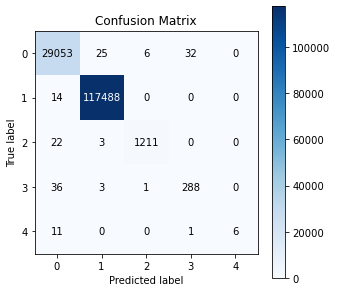

In [26]:
fig, ax = plt.subplots(figsize=(5,5))
plot_confusion_matrix(y_test,y_pred_svm_5, ax=ax)

In [35]:
print('recall: ', recall_score(y_test, y_pred_svm_5, average= 'macro')*100)
print('precision: ', precision_score(y_test, y_pred_svm_5, average= 'macro')*100)
print('F1 Score:  ', f1_score(y_test, y_pred_svm_5, average= 'macro')*100)
print('acc:  ' , accuracy_score(y_test, y_pred_svm_5)*100)

recall:  83.77745341876202
precision:  97.76673277225785
F1 Score:   87.43563003271258
acc:   99.89608636977057


5.kısım sonuç:
5 farklı model ile eğitim ve test gerçekleştirilmiştir.
accuracy metriği tüm modeller için hesaplanmıştır ancak  precision, recall ve f1 score metrikleri ise sadece svm modeli için hesaplanmıştır.

Bu aşamada 5 sınıf ayrıştırılmaya çalışılmıştır. Dos, u2r, r2l, probe ve normal sınıfları. DOS kategorisi başta olmak üzere , her bir karegoriye ait attack türleri o kategory isimi ile değiştildi. Yani [smurf] attack, dos kategorisine ait olduğu için dos olarak isimlendirildi. Bu isimlendirme uygulaması diğer tüm attacklere yapıldı. Böylelikle [label] sütununda toplamda 5 farklı sınıf oldu.

Ayrıştırma bu beş üzerinde gerçekleştirldi. Bundan amanç model en iyi hangi kategoriyi daha iyi tanıyabildiğini gözlemlemek.

En yüksek Accuracy  değerinin Decision Tree modeli ile elde edilmişit. acc_dtc = 99.95 , en düşük Accuracy değeri ise Gaussian Naive Bayes  ile elde edildi. acc_gnb :  85.11 . Farklı modeller kullanmanın faydalarını bu gibi karşılaştırmalarda görmek mümkündür. 


Diğer metriclere bakıldığı zaman Recall metriği diğerlerine göre daha düşük gelmiş. Bunun sebebi FN olarak tahmin edilenlerin sayısının fazla olmasında kaynaklı. FN: modelin negatif diye tahmin edip ama aslında pozitif olduğu durumu temsil etmektedir. recall:  83.77



Kaynaklar:

[1] https://dergipark.org.tr/en/download/article-file/165615
[2] https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-019-1004-8#ref-CR24
[3] https://medium.com/cuelogic-technologies/evaluation-of-machine-learning-algorithms-for-intrusion-detection-system-6854645f9211
[4] http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

[5] https://datahub.io/machine-learning/kddcup99